## 获取数据

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 1, 1)
df = web.DataReader('GOOGL', 'stooq', start, end)
df.dropna(inplace=True)
df.sort_index(inplace=True)
print(df)

                Open      High       Low     Close    Volume
Date                                                        
2020-01-02   67.4205   68.4340   67.3245   68.4340  27285300
2020-01-03   67.4000   68.6875   67.3660   68.0760  23412580
2020-01-06   67.5815   69.9160   67.5500   69.8905  46786860
2020-01-07   70.0230   70.1750   69.5780   69.7555  34529120
2020-01-08   69.7410   70.5925   69.6315   70.2520  35325480
...              ...       ...       ...       ...       ...
2023-12-22  140.7700  141.9900  140.7100  141.4900  26532199
2023-12-26  141.5900  142.6800  141.1900  141.5200  16780333
2023-12-27  141.5900  142.0800  139.8860  140.3700  19628618
2023-12-28  140.7800  141.1400  139.7500  140.2300  16045712
2023-12-29  139.6300  140.3600  138.7800  139.6900  18733017

[1006 rows x 5 columns]


In [2]:
df.iloc[:,:-1]

,Open,High,Low,Close
Date,,,,
2020-01-02,67.4205,68.4340,67.3245,68.4340
2020-01-03,67.4000,68.6875,67.3660,68.0760
2020-01-06,67.5815,69.9160,67.5500,69.8905
2020-01-07,70.0230,70.1750,69.5780,69.7555
2020-01-08,69.7410,70.5925,69.6315,70.2520
...,...,...,...,...
2023-12-22,140.7700,141.9900,140.7100,141.4900
2023-12-26,141.5900,142.6800,141.1900,141.5200
2023-12-27,141.5900,142.0800,139.8860,140.3700


## 输入输出

In [3]:
mem_his_days=5
per_days=10
df.dropna(inplace=True)
df.sort_index(inplace=True)

df['label'] = df['Close'].shift(-per_days)

In [50]:
# def stock_price_lstm_data_precesing(df,mem_his_days=5,per_days=10):
# mem_his_days=5
# per_days=10
# df.dropna(inplace=True)
# df.sort_index(inplace=True)

# df['label'] = df['Close'].shift(-per_days)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X = scaler.fit_transform(df.iloc[:,:-1])
# sca_X = np.array(df.iloc[:,:-1])
# print(sca_X)

from collections import deque
deq = deque(maxlen=mem_his_days)

X = []
for i in sca_X:
    deq.append(list(i))
    if len(deq)==mem_his_days:
        X.append(list(deq))



X_lately = X[-per_days:]
X = X[:-per_days]
y = df['label'].values[mem_his_days-1:-per_days]

import numpy as np
X = np.array(X)
y = np.array(y)

    # return X,y,X_lately

In [16]:
sca_X

array([[6.7420500e+01, 6.8434000e+01, 6.7324500e+01, 6.8434000e+01,
        2.7285300e+07],
       [6.7400000e+01, 6.8687500e+01, 6.7366000e+01, 6.8076000e+01,
        2.3412580e+07],
       [6.7581500e+01, 6.9916000e+01, 6.7550000e+01, 6.9890500e+01,
        4.6786860e+07],
       ...,
       [1.4159000e+02, 1.4208000e+02, 1.3988600e+02, 1.4037000e+02,
        1.9628618e+07],
       [1.4078000e+02, 1.4114000e+02, 1.3975000e+02, 1.4023000e+02,
        1.6045712e+07],
       [1.3963000e+02, 1.4036000e+02, 1.3878000e+02, 1.3969000e+02,
        1.8733017e+07]])

In [17]:
X

[[[67.4205, 68.434, 67.3245, 68.434, 27285300.0],
  [67.4, 68.6875, 67.366, 68.076, 23412580.0],
  [67.5815, 69.916, 67.55, 69.8905, 46786860.0],
  [70.023, 70.175, 69.578, 69.7555, 34529120.0],
  [69.741, 70.5925, 69.6315, 70.252, 35325480.0]],
 [[67.4, 68.6875, 67.366, 68.076, 23412580.0],
  [67.5815, 69.916, 67.55, 69.8905, 46786860.0],
  [70.023, 70.175, 69.578, 69.7555, 34529120.0],
  [69.741, 70.5925, 69.6315, 70.252, 35325480.0],
  [71.0965, 71.434, 70.5105, 70.9895, 33228760.0]],
 [[67.5815, 69.916, 67.55, 69.8905, 46786860.0],
  [70.023, 70.175, 69.578, 69.7555, 34529120.0],
  [69.741, 70.5925, 69.6315, 70.252, 35325480.0],
  [71.0965, 71.434, 70.5105, 70.9895, 33228760.0],
  [71.4735, 71.747, 70.98, 71.448, 26263560.0]],
 [[70.023, 70.175, 69.578, 69.7555, 34529120.0],
  [69.741, 70.5925, 69.6315, 70.252, 35325480.0],
  [71.0965, 71.434, 70.5105, 70.9895, 33228760.0],
  [71.4735, 71.747, 70.98, 71.448, 26263560.0],
  [71.7625, 72.074, 71.2685, 72.0015, 30746340.0]],
 [[69.741

In [57]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# sca_X = scaler.fit_transform(df.iloc[:,:-1])
# # sca_X = df.iloc[:,:-1]
# print(sca_X)

[[-1.50852918 -1.51242597 -1.47633483 -1.47434421 -0.52178383]
 [-1.50935309 -1.50228268 -1.47465265 -1.48877279 -0.77520922]
 [-1.50205852 -1.45312675 -1.46719433 -1.41564245  0.75437105]
 ...
 [ 0.97763223  1.01143189  0.97945937  0.93079561 -0.59626225]
 [ 0.97280938  1.01543319  1.02445251  1.0686329  -0.81881031]
 [ 1.03148744  1.01143189  1.04573304  1.06339347 -0.76718638]]


In [52]:
# X,y,X_lately = stock_price_lstm_data_precesing(df,mem_his_days=5,per_days=50)

[[-1.50852918 -1.51242597 -1.47633483 -1.47434421 -0.52178383]
 [-1.50935309 -1.50228268 -1.47465265 -1.48877279 -0.77520922]
 [-1.50205852 -1.45312675 -1.46719433 -1.41564245  0.75437105]
 ...
 [ 0.97763223  1.01143189  0.97945937  0.93079561 -0.59626225]
 [ 0.97280938  1.01543319  1.02445251  1.0686329  -0.81881031]
 [ 1.03148744  1.01143189  1.04573304  1.06339347 -0.76718638]]


In [5]:
print(len(X))
print(len(y))
print(len(X_lately))

992
992
10


In [21]:
X[0]

array([[-1.60523727, -1.60925658, -1.57262997, -1.5710188 , -0.48093781],
       [-1.60605218, -1.599222  , -1.57096807, -1.58528042, -0.7390004 ],
       [-1.59883732, -1.55059286, -1.56359964, -1.51299633,  0.81856825],
       [-1.50178454, -1.54034056, -1.4823867 , -1.51837432,  0.00176142],
       [-1.51299441, -1.52381418, -1.48024425, -1.49859529,  0.05482767]])

# LSTM

## 参数寻优

In [14]:
# mem_days = [5,10,15]
# lstm_layers = [1,2,3]
# dens_layers = [1,2,3]
# units = [8,16,32]
mem_days = [5]
lstm_layers = [1]
dens_layers = [1]
units = [32]
from tensorflow.keras.callbacks import ModelCheckpoint
for the_mem_days in mem_days:
    for the_lstm_layers in lstm_layers:
        for the_dens_layers in dens_layers:
            for the_units in units:
                # save model
                filepath = '{val_mape:.2f}_{epoch:02d}'+f'_mem_{the_mem_days}_lstm_{the_lstm_layers}_dense_{the_dens_layers}_unit_{the_units}'
                checkpoint = ModelCheckpoint(
                    filepath=filepath,
                    save_weights_only=False,
                    monitor='val_mape',
                    mode='min',
                    save_best_only=True)
                # print(filepath)
                X,y,X_lately = stock_price_lstm_data_precesing(df,mem_his_days=the_mem_days,per_days=10)
                from sklearn.model_selection import train_test_split
                X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

                import tensorflow as tf
                from tensorflow.keras.models import Sequential
                from tensorflow.keras.layers import LSTM,Dense,Dropout
                model = Sequential()
                model.add(LSTM(the_units,input_shape=X.shape[1:],activation='relu',return_sequences=True))
                model.add(Dropout(0.1))
            
                for i in range(the_lstm_layers):
                    model.add(LSTM(the_units,activation='relu',return_sequences=True))
                    model.add(Dropout(0.1))
                model.add(LSTM(the_units,activation='relu'))
                model.add(Dropout(0.1))

                for i in range(the_dens_layers):
                    model.add(Dense(the_units,activation='relu'))
                    model.add(Dropout(0.1))
                model.add(Dense(1))
                # model.summary()
                model.compile(optimizer='adam',loss='mse',metrics=['mape'])
                model.fit(X_train,y_train,batch_size=32,epochs=50,
                          validation_data=(X_test,y_test),
                          callbacks=[checkpoint])

                

Epoch 1/50
28/28 [==============================] - 3s 22ms/step - loss: 11651.4611 - mape: 99.8918 - val_loss: 17493.7891 - val_mape: 99.4470
INFO:tensorflow:Assets written to: 99.45_01_mem_5_lstm_1_dense_1_unit_32\assets
Epoch 2/50
28/28 [==============================] - 0s 9ms/step - loss: 10347.3222 - mape: 92.7067 - val_loss: 2912.8574 - val_mape: 33.6115
INFO:tensorflow:Assets written to: 33.61_02_mem_5_lstm_1_dense_1_unit_32\assets
Epoch 3/50
28/28 [==============================] - 0s 9ms/step - loss: 4716.4767 - mape: 56.1884 - val_loss: 1611.8400 - val_mape: 26.5446
INFO:tensorflow:Assets written to: 26.54_03_mem_5_lstm_1_dense_1_unit_32\assets
Epoch 4/50
28/28 [==============================] - 0s 9ms/step - loss: 1245.8792 - mape: 28.1968 - val_loss: 160.4651 - val_mape: 7.7684
INFO:tensorflow:Assets written to: 7.77_04_mem_5_lstm_1_dense_1_unit_32\assets
Epoch 5/50
28/28 [==============================] - 0s 9ms/step - loss: 332.9750 - mape: 13.9934 - val_loss: 119.9756 -

## 构建网络

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model = Sequential(name="lstm_m5_p10")
model.add(LSTM(32,input_shape=X.shape[1:],activation='relu',return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()

Model: "lstm_m5_p10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 32)             4864      
_________________________________________________________________
dropout_23 (Dropout)         (None, 5, 32)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 32)             8320      
_________________________________________________________________
dropout_24 (Dropout)         (None, 5, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                

In [25]:
model.compile(optimizer='adam',loss='mse',metrics=['mape'])
model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
28/28 [==============================] - 3s 30ms/step - loss: 12314.2486 - mape: 99.9311 - val_loss: 12120.0371 - val_mape: 99.3581
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 11696.0454 - mape: 96.1329 - val_loss: 5455.2661 - val_mape: 64.1167
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 5918.0072 - mape: 65.5197 - val_loss: 2956.1316 - val_mape: 46.2091
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 2649.6404 - mape: 41.9161 - val_loss: 441.7848 - val_mape: 18.2682
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 634.0789 - mape: 19.6134 - val_loss: 91.4104 - val_mape: 7.6669
Epoch 6/50
28/28 [==============================] - 0s 5ms/step - loss: 419.8439 - mape: 14.9686 - val_loss: 90.5696 - val_mape: 7.4505
Epoch 7/50
28/28 [==============================] - 0s 8ms/step - loss: 380.8013 - mape: 14.1230 - val_loss: 63.8776 - val_mape: 6.1693
Epoch 8/50
28/28 [===========

## 读取推理

In [10]:
from tensorflow.keras.models import load_model
best_model = load_model('E:\\Document\\Timing-signal-analysis\\lstm_3.90_18_mem_5_lstm_1_dense_1_unit_32')
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 32)             4864      
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 32)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 32)             8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [11]:
best_model.evaluate(X_test,y_test)
pre = best_model.predict(X_test)
print(pre)

4/4 [==============================] - 0s 2ms/step - loss: 55.3873 - mape: 5.5005
[[129.41464 ]
 [118.26525 ]
 [136.6153  ]
 [143.1014  ]
 [104.471565]
 [138.16423 ]
 [ 92.8579  ]
 [131.93759 ]
 [ 75.1089  ]
 [ 88.95208 ]
 [131.27351 ]
 [ 91.102936]
 [ 91.310295]
 [106.262985]
 [119.57534 ]
 [121.73855 ]
 [147.15489 ]
 [133.11293 ]
 [118.41703 ]
 [ 78.84296 ]
 [122.72548 ]
 [144.58809 ]
 [ 98.8622  ]
 [ 91.73921 ]
 [109.69268 ]
 [ 71.78455 ]
 [143.57095 ]
 [128.43443 ]
 [ 79.10935 ]
 [ 90.28849 ]
 [111.86808 ]
 [117.19536 ]
 [100.88237 ]
 [129.83922 ]
 [132.70615 ]
 [132.12862 ]
 [ 98.6206  ]
 [ 96.67751 ]
 [127.495804]
 [118.5989  ]
 [132.34381 ]
 [124.48728 ]
 [115.097336]
 [140.72011 ]
 [140.82518 ]
 [127.32608 ]
 [112.33448 ]
 [130.29    ]
 [137.43391 ]
 [145.75227 ]
 [119.570564]
 [124.77564 ]
 [140.02019 ]
 [ 72.651924]
 [ 70.10477 ]
 [ 72.36695 ]
 [104.13375 ]
 [137.68901 ]
 [ 77.69765 ]
 [119.00932 ]
 [137.48386 ]
 [ 70.745125]
 [123.24856 ]
 [132.26405 ]
 [116.44264 ]
 [137.76

In [12]:
print(X_test.shape)
print(y_test.shape)
print(pre.shape)

(100, 5, 5)
(100,)
(100, 1)


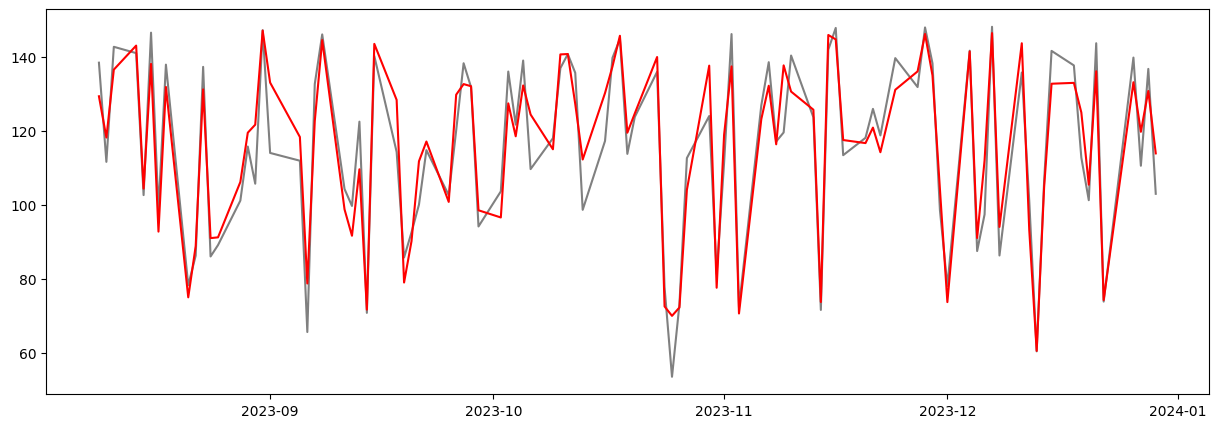

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y_test):]
plt.plot(df_time,y_test,color='gray',label='price')
plt.plot(df_time,pre,color='red',label='predict')
plt.show()

# ENN

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## 构建网络

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.regularizers import l1_l2

# alpha是正则化项的强度，l1_ratio是L1正则化相对于L2的比例
alpha = 0.01
l1_ratio = 0.5
regularizer = l1_l2(l1=alpha * l1_ratio, l2=alpha * (1 - l1_ratio))

model = Sequential(name="ENN")
model.add(Dense(32, activation='relu', input_shape=X.shape[1:], kernel_regularizer=regularizer))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32,activation='relu',kernel_regularizer=regularizer))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear', kernel_regularizer=regularizer))
model.summary()

Model: "ENN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5, 32)             192       
_________________________________________________________________
dropout (Dropout)            (None, 5, 32)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 32)             1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5152      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0       

In [30]:
X.shape[1:]

(5, 5)

In [8]:
model.compile(optimizer='adam',loss='mse',metrics=['mape'])
model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
28/28 [==============================] - 1s 18ms/step - loss: 12080.0508 - mape: 98.7946 - val_loss: 11165.0059 - val_mape: 95.6526
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 10577.3403 - mape: 91.5983 - val_loss: 7425.5889 - val_mape: 75.1472
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 5793.1649 - mape: 63.2076 - val_loss: 1917.1110 - val_mape: 35.9317
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 2461.6695 - mape: 39.0804 - val_loss: 1438.5591 - val_mape: 30.3648
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 2044.3289 - mape: 35.8454 - val_loss: 1241.7805 - val_mape: 27.2153
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 1688.7188 - mape: 31.9022 - val_loss: 967.3706 - val_mape: 25.0639
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 1607.4968 - mape: 31.1514 - val_loss: 745.2822 - val_mape: 21.7988
Epoch 8/50
28/28 [

## 推理

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

[[125.390465]
 [ 70.08205 ]
 [141.31355 ]
 [144.27321 ]
 [133.19054 ]
 [116.31548 ]
 [ 98.59005 ]
 [ 91.8994  ]
 [ 96.123375]
 [ 94.086914]
 [124.76907 ]
 [134.64513 ]
 [124.41437 ]
 [ 58.313374]
 [ 68.65922 ]
 [ 89.49272 ]
 [ 89.224335]
 [117.6282  ]
 [130.19218 ]
 [124.57097 ]
 [ 74.90184 ]
 [115.94844 ]
 [ 76.18422 ]
 [ 72.76107 ]
 [124.62975 ]
 [ 99.5755  ]
 [108.09078 ]
 [139.51187 ]
 [100.78346 ]
 [126.964005]
 [144.175   ]
 [117.56323 ]
 [ 69.01232 ]
 [ 85.98433 ]
 [ 55.382126]
 [132.30252 ]
 [ 94.00181 ]
 [ 73.03669 ]
 [134.13457 ]
 [125.04262 ]
 [126.377884]
 [ 72.16472 ]
 [112.698715]
 [ 65.674965]
 [133.63503 ]
 [105.90431 ]
 [131.2783  ]
 [120.681725]
 [119.693085]
 [ 91.36744 ]
 [ 88.418335]
 [143.99614 ]
 [117.270805]
 [ 68.26246 ]
 [100.62885 ]
 [110.10483 ]
 [ 95.58554 ]
 [113.72816 ]
 [102.839355]
 [104.98465 ]
 [ 85.92517 ]
 [103.798676]
 [ 97.00697 ]
 [ 98.780334]
 [ 65.012634]
 [ 69.585686]
 [ 65.19566 ]
 [ 62.934254]
 [ 84.83401 ]
 [119.19334 ]
 [125.3047  ]
 [ 67.

In [13]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(100, 5, 5)
(100,)
(100, 1)


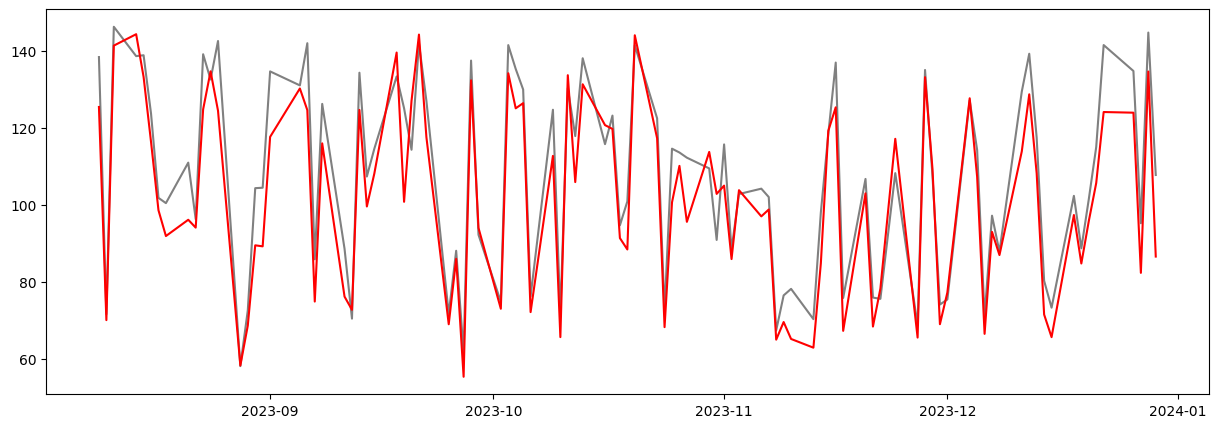

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y_test):]
plt.plot(df_time,y_test,color='gray',label='price')
plt.plot(df_time,y_pred,color='red',label='predict')
plt.show()

# WNN

In [25]:
from sklearn.model_selection import train_test_split
import pywt  # 小波变换库

coefficients = pywt.wavedec2(X, 'db1', level=1)  # 使用db1小波和一层分解
input_shape = coefficients[0].shape  # 更新输入形状以匹配小波变换后的数据
X_train,X_test,y_train,y_test = train_test_split(coefficients[0],y,test_size=0.1)

## 构建网络

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.regularizers import l1_l2

# coefficients = pywt.wavedec2(X, 'db1', level=1)  # 使用db1小波和一层分解
# input_shape = coefficients[0].shape  # 更新输入形状以匹配小波变换后的数据

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape[1:]))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 3, 32)             128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                3104      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
____________________________________________________

In [27]:
model.compile(optimizer='adam',loss='mse',metrics=['mape'])
model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
28/28 [==============================] - 0s 6ms/step - loss: 12306.8664 - mape: 99.0967 - val_loss: 11972.1504 - val_mape: 95.9224
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 11317.9449 - mape: 95.3720 - val_loss: 10538.2129 - val_mape: 88.8999
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 9939.7036 - mape: 88.2782 - val_loss: 8170.2275 - val_mape: 76.2603
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 7539.3552 - mape: 75.8059 - val_loss: 5201.7754 - val_mape: 59.9342
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 5248.5191 - mape: 61.0299 - val_loss: 2763.1250 - val_mape: 43.6794
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 3505.9790 - mape: 49.7612 - val_loss: 1728.9368 - val_mape: 33.3416
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 2739.7919 - mape: 42.6349 - val_loss: 1474.6931 - val_mape: 30.7415
Epoch 8/50
28/28

## 推理

In [28]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 73.57111 ]
 [136.28801 ]
 [ 72.659   ]
 [ 78.12719 ]
 [113.34011 ]
 [132.5562  ]
 [ 88.81299 ]
 [ 86.084496]
 [ 77.021416]
 [ 67.27254 ]
 [123.11159 ]
 [127.66713 ]
 [ 89.57292 ]
 [121.59929 ]
 [ 63.282616]
 [ 88.41026 ]
 [123.602425]
 [110.59224 ]
 [ 76.5977  ]
 [ 70.27699 ]
 [ 69.73872 ]
 [ 77.583374]
 [128.03528 ]
 [122.31089 ]
 [132.30853 ]
 [111.11371 ]
 [119.812805]
 [111.370186]
 [ 69.901024]
 [ 78.647705]
 [119.84993 ]
 [112.460724]
 [ 70.86672 ]
 [ 85.571434]
 [124.14312 ]
 [133.0771  ]
 [115.67542 ]
 [ 77.26033 ]
 [139.40974 ]
 [ 80.5132  ]
 [ 60.46893 ]
 [122.82164 ]
 [111.59445 ]
 [ 80.79733 ]
 [ 69.27664 ]
 [129.07417 ]
 [126.39863 ]
 [ 90.523544]
 [ 92.89403 ]
 [138.14532 ]
 [129.54526 ]
 [ 79.562416]
 [140.92812 ]
 [119.78309 ]
 [104.05228 ]
 [ 72.95009 ]
 [123.4929  ]
 [131.30496 ]
 [ 78.62933 ]
 [131.7535  ]
 [ 79.823364]
 [ 96.51771 ]
 [109.34664 ]
 [109.33473 ]
 [129.91077 ]
 [ 74.73539 ]
 [ 83.63687 ]
 [ 71.09439 ]
 [128.06554 ]
 [ 69.88222 ]
 [ 94.73935 ]
 [113.

In [29]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(100, 3, 3)
(100,)
(100, 1)


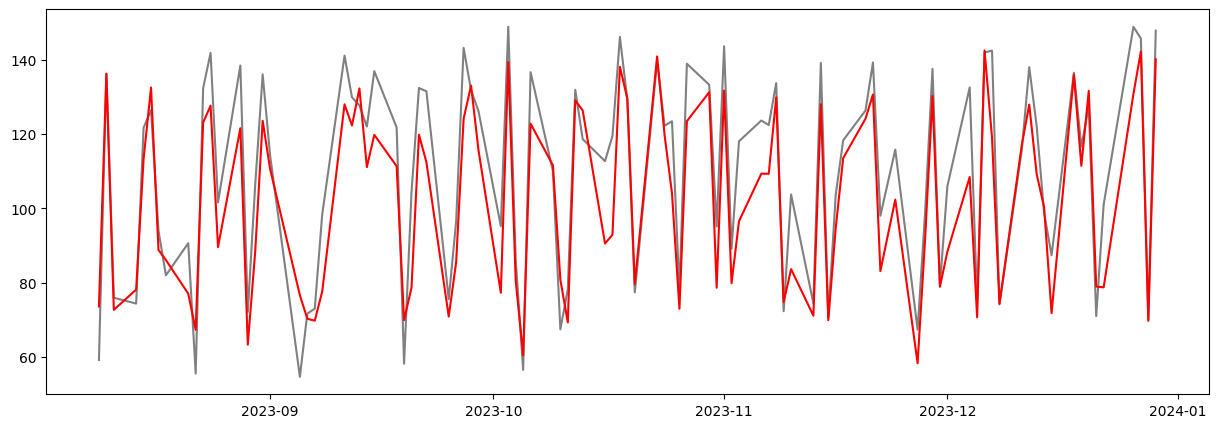

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y_test):]
plt.plot(df_time,y_test,color='gray',label='price')
plt.plot(df_time,y_pred,color='red',label='predict')
plt.show()

# RBFNN

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [70]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda,Layer
from tensorflow.keras.layers import Wrapper
from tensorflow.keras.optimizers import Adam

class RBFLayer(Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma
        # 将RBF中心初始化为输入的均值（或随机值）
        self.centers = self.add_weight(name='centers',
                                       shape=(units,),
                                       initializer='zeros',
                                       trainable=True)

    def call(self, inputs):
        # 计算输入和中心之间的差的平方和
        squared_diff = tf.reduce_sum(tf.square(inputs[:, None, :] - self.centers[None, :, :]), axis=-1)
        # 应用径向基函数
        return tf.exp(-self.gamma * squared_diff)

    def compute_output_shape(self, input_shape):
        # 输出形状与输入样本数相同
        return (input_shape[0], self.units)

In [72]:
model = Sequential()
model.add(RBFLayer(Dense(64), gamma=0.5, input_shape=(25,)))
model.add(Dense(1),activation='linear')
model.summary()


TypeError: Dimension value must be integer or None or have an __index__ method, got value '<tensorflow.python.keras.layers.core.Dense object at 0x0000024382156C88>' with type '<class 'tensorflow.python.keras.layers.core.Dense'>'

In [36]:

X_train.shape

(892, 5, 5)

In [38]:
rbf_matrix.shape

(892, 1)

# LS-SVM

In [59]:
from sklearn.model_selection import train_test_split
X_flattened = X.reshape(X.shape[0], -1)  # (样本数, 25)
X_train,X_test,y_train,y_test = train_test_split(X_flattened,y,test_size=0.1)

In [61]:
X_flattened.shape

(992, 25)

In [62]:
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 创建LS-SVM回归模型
# 创建LS-SVM回归模型，使用RBF核函数
model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

In [64]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[137.87022736  78.24954969 129.1330986  125.93461552 128.54064071
  90.9565062  136.67307823 136.97184774  76.9944376   98.91180702
 103.37475399  80.1255505   81.78827274 111.06351724  88.5934799
 103.8119575   99.15692565 129.22229559 138.34933075  74.33561938
 134.42188877 106.3047346  101.86022915 130.00275857  73.21632857
  99.42377578  79.21291916 110.55607762 106.53848695 128.74869405
 130.76082129 103.37086463 135.36152012  89.14105973 138.44837374
 117.90895392 138.9380382   88.54502978  90.11838616 133.65551908
 108.75788263 137.5729971   73.25002241 109.73106367  97.70590001
  72.91846337 113.53823294 121.34614159  69.84303622  88.82095096
 137.54618518  67.12474318 136.45283128  98.5587298   78.72312709
 132.61950109 120.70149049  76.68375709 139.13702579 125.82743357
 129.60893452 136.53001276 138.80016829  88.19328176 117.40948944
  88.33818012 129.01862138 103.55086402  83.05876668  68.5368019
 123.65642093  73.17784568 137.53034499 139.27990177  98.18407752
 140.2192481

In [65]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(100, 25)
(100,)
(100,)


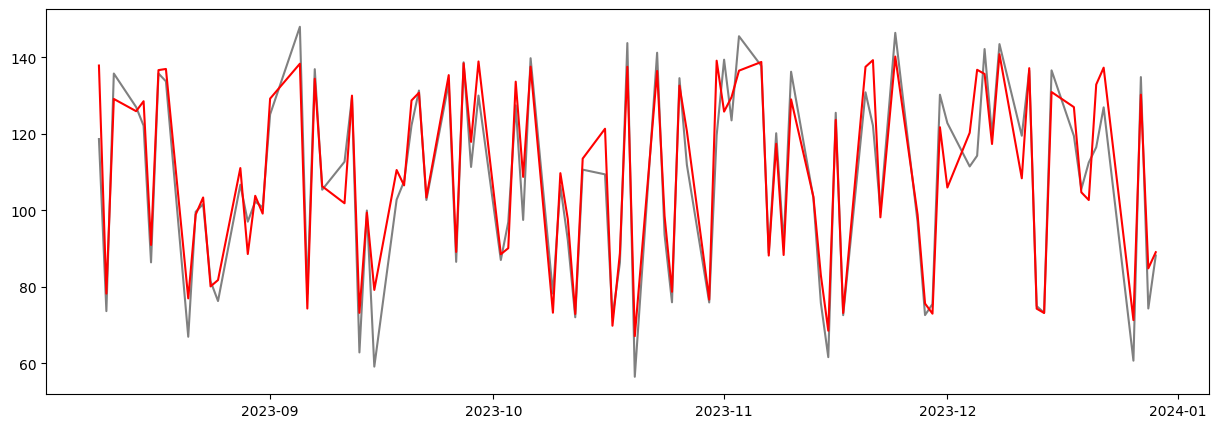

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
df_time = df.index[-len(y_test):]
plt.plot(df_time,y_test,color='gray',label='price')
plt.plot(df_time,y_pred,color='red',label='predict')
plt.show()